# Architecture

## Main Part

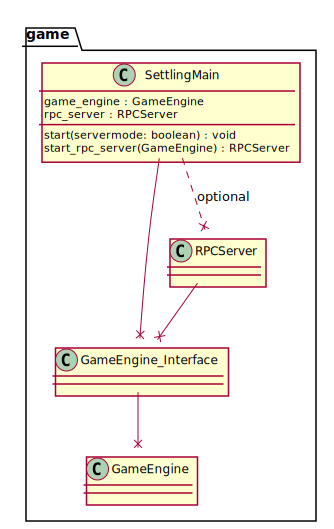

In [2]:
%%plantuml

@startuml
package "game" {
    class SettlingMain
    {
        game_engine : GameEngine
        rpc_server : RPCServer
        start(servermode: boolean) : void
        start_rpc_server(GameEngine) : RPCServer
    }
    class GameEngine_Interface
    class RPCServer
    class GameEngine
}

SettlingMain ..x RPCServer : optional
SettlingMain --x GameEngine_Interface
GameEngine_Interface --x GameEngine
RPCServer --x GameEngine_Interface

@enduml

# Game Engine

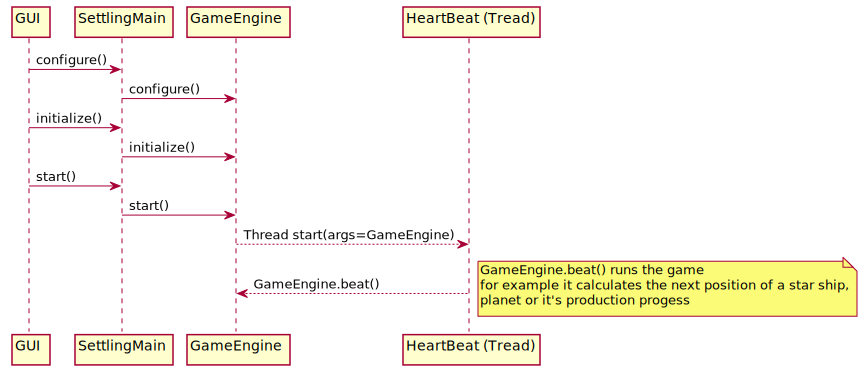

In [20]:
%%plantuml

@startuml
GUI -> SettlingMain : configure()
SettlingMain -> GameEngine : configure()
GUI -> SettlingMain : initialize()
SettlingMain -> GameEngine : initialize()
GUI -> SettlingMain : start()
SettlingMain -> GameEngine : start()
GameEngine --> "HeartBeat (Tread)" as HeartBeat : Thread start(args=GameEngine)
HeartBeat --> GameEngine : GameEngine.beat()
note right
GameEngine.beat() runs the game
for example it calculates the next position of a star ship,
planet or it's production progess
end note
@enduml

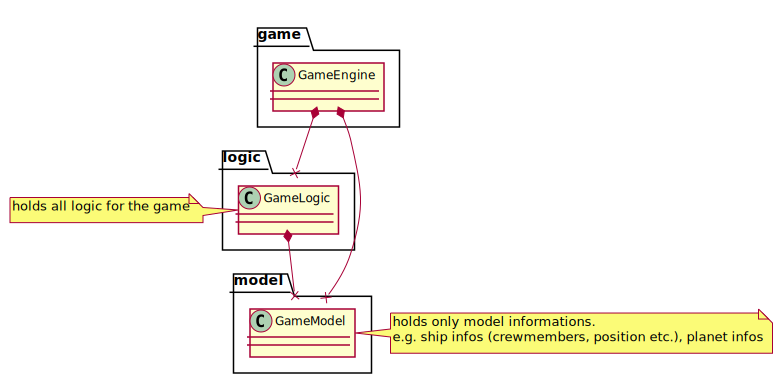

In [10]:
%%plantuml

@startuml
package "game" {
    class GameEngine
}

package "logic" {
    class GameLogic
}
package "model" {
    class GameModel
}

GameEngine *--x GameLogic
GameEngine *--x GameModel
GameLogic *--x GameModel

note left of GameLogic
  holds all logic for the game
end note

note left of GameModel
  holds only model informations.
  e.g. ship infos (crewmembers, position etc.), planet infos
end note

@enduml

### Gui

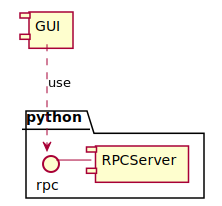

In [11]:
%%plantuml

@startuml
component GUI

package "python" {
    rpc - [RPCServer]
}

GUI ..> rpc : use

@enduml

or

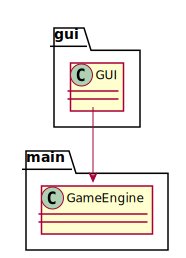

In [12]:
%%plantuml

@startuml

package "gui" {
    class GUI
}

package "main" {
    class GameEngine
}

GUI --> GameEngine

@enduml

## Generic components

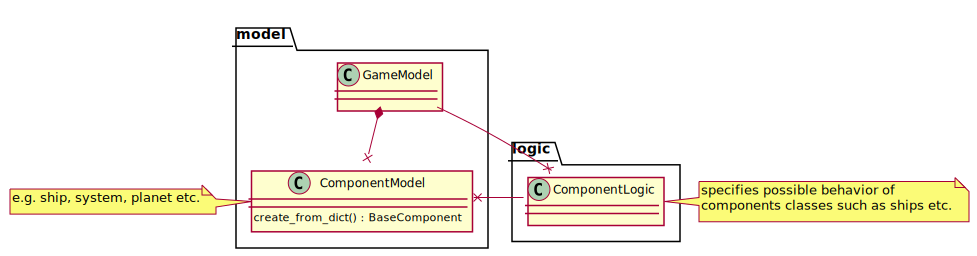

In [19]:
%%plantuml

@startuml

package "logic" {
    class ComponentLogic
}
package "model" {
    class GameModel
    class ComponentModel{
    {static} create_from_dict() : BaseComponent
    }
}

GameModel *--x ComponentModel

GameModel --x ComponentLogic
ComponentLogic --x ComponentModel

note left of ComponentModel
  e.g. ship, system, planet etc.
end note

note left of ComponentLogic
  specifies possible behavior of 
  components classes such as ships etc.
end note

@enduml